In [2]:
import matplotlib.pyplot as plt
%matplotlib notebook
import ast
import numpy as np
from scipy.ndimage import gaussian_filter1d
# control_param = [stiffness,angle,acc,vel,depth,distance,hold_time]

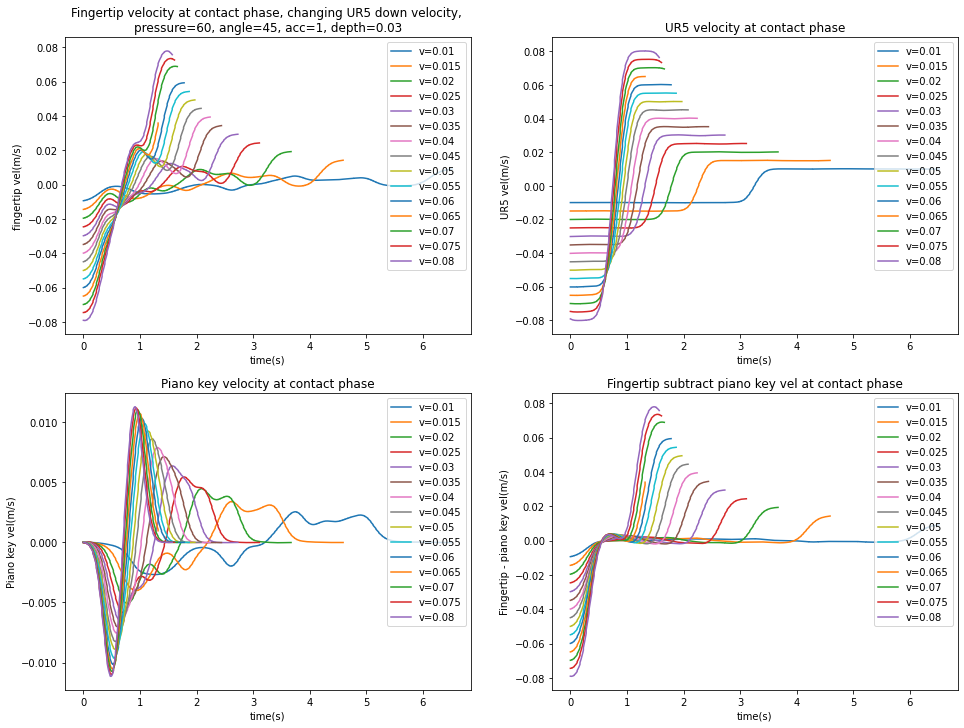

In [133]:
# velocity diagram changing under UR5 changing ctrl velocity 
pressure = 60
angle = 45
acc = 1
depth = 0.03
distance = 0.05
hold_time = 0

with open('../paper_data/all/all_data_soft_'+str(pressure)+'_angle_'+str(angle)+'.txt', 'r') as f:
    lines = f.readlines()
    i = 0
    
    data = []
    
    for line in lines:
        dict = ast.literal_eval(line)
        data.append(dict)
        i+=1

def create_time_seq(n):
    time = []
    i = 0
    for i in range(n):
        time.append(round(0.1/12*i,2))
    return time

ctrl_vel_list = []
time_seq_list = []
ur5_vel_seq_list = []
ur5_time_seq_list = []

fin_disp_seq_list = []
pia_disp_seq_list = []

fin_vel_seq_list = []
pia_vel_seq_list = []
fin_sub_pia_vel_seq_list = []
min_pia_vel_list = []
max_pia_vel_list = []
time_seq_list = []
gain = 2

for d in data:
    ctrl = np.array(d['control'])
    if list(ctrl[[0,1,2,4,5,6]])==list(map(float, [pressure,angle,acc,depth,distance,hold_time])):
        ctrl_vel_list.append(ctrl[3])
        fin_vel_seq_list.append(d['vfi'])
        time_seq_list.append(create_time_seq(len(d['vfi'])))
        ur5_vel_seq_list.append(d['vur'])
        ur5_time_seq_list.append(create_time_seq(len(d['vur'])))
        
        pia_vel_seq_list.append(d['vpi'])
        fin_sub_pia_vel_seq_list.append(list(np.subtract(np.array(d['vfi']), gain*np.array(d['vpi']))))
        min_pia_vel_list.append(-min(d['vpi']))
        max_pia_vel_list.append(max(d['vpi']))
        
        fin_disp_seq_list.append(d['dfi'])
        pia_disp_seq_list.append(d['dpi'])

plt.figure(figsize=(16,12))
plt.subplot(2, 2, 1)
for i in range(len(ctrl_vel_list)):
    plt.plot(time_seq_list[i], fin_vel_seq_list[i], label = str('v='+str(round(ctrl_vel_list[i],3))))
    
plt.title("Fingertip velocity at contact phase, changing UR5 down velocity, "+"\n"+"pressure="+str(pressure)+', angle='+str(angle)+', acc='+str(acc)+', depth='+str(depth))
plt.xlabel('time(s)')
plt.ylabel('fingertip vel(m/s)')
plt.legend()    

plt.subplot(2, 2, 2)
for i in range(len(ctrl_vel_list)):
    plt.plot(ur5_time_seq_list[i], ur5_vel_seq_list[i], label = str('v='+str(round(ctrl_vel_list[i],3))))
    
plt.title("UR5 velocity at contact phase")
plt.xlabel('time(s)')
plt.ylabel('UR5 vel(m/s)')
plt.legend() 

plt.subplot(2, 2, 3)
for i in range(len(ctrl_vel_list)):
    plt.plot(ur5_time_seq_list[i], pia_vel_seq_list[i], label = str('v='+str(round(ctrl_vel_list[i],3))))
    
plt.title("Piano key velocity at contact phase")
plt.xlabel('time(s)')
plt.ylabel('Piano key vel(m/s)')
plt.legend() 

plt.subplot(2, 2, 4)
for i in range(len(ctrl_vel_list)):
    plt.plot(ur5_time_seq_list[i], fin_sub_pia_vel_seq_list[i], label = str('v='+str(round(ctrl_vel_list[i],3))))
    
plt.title("Fingertip subtract piano key vel at contact phase")
plt.xlabel('time(s)')
plt.ylabel('Fingertip - piano key vel(m/s)')
plt.legend() 

plt.show()

<IPython.core.display.Javascript object>


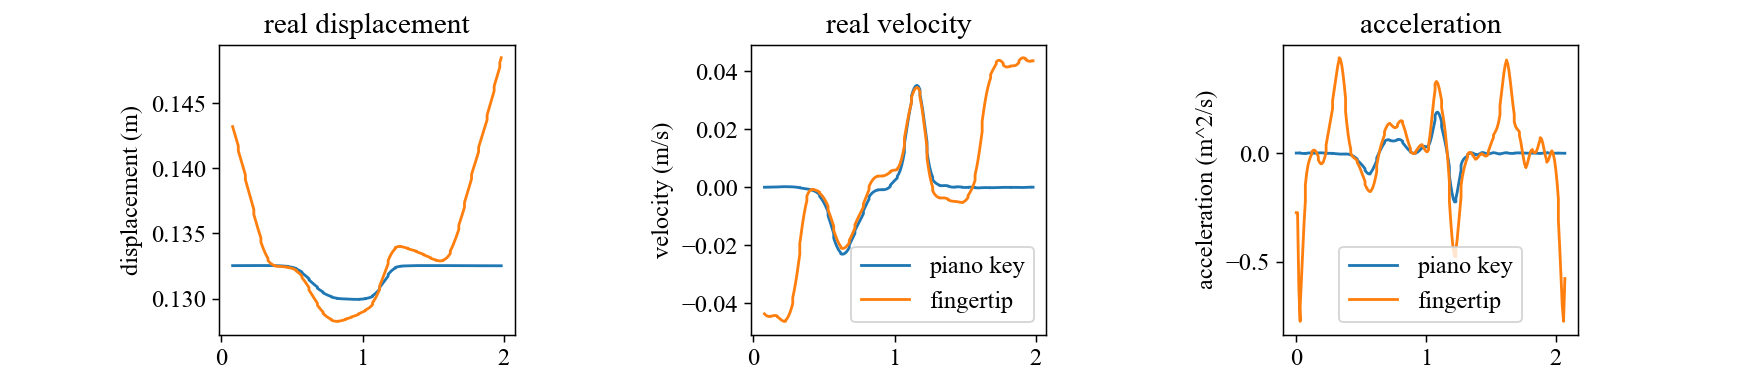

In [15]:
pressure = 20
angle = 45
acc = 1
depth = 0.03
distance = 0.05
hold_time = 0

def create_time_seq(n):
    time = []
    i = 0
    for i in range(n):
        time.append(round(0.1/12*i,2))
    return time

def get_seq_derivative(seq):
    der = []
    # camera frequency 120Hz
    dt = 1/120
    
    for i in range(1,len(seq)):
        der.append((seq[i]-seq[i-1])/dt)
    
    der.insert(0,der[0])
    
    return der

def fin_pia_disp(pressure,vel):
    with open('../paper_data/all/all_data_soft_'+str(pressure)+'_angle_'+str(angle)+'.txt', 'r') as f:
        lines = f.readlines()
        i = 0

        data = []

        for line in lines:
            dict = ast.literal_eval(line)
            data.append(dict)
            i+=1

    ctrl_vel_list = []
    time_seq_list = []
    ur5_vel_seq_list = []
    ur5_time_seq_list = []
    
    ur5_disp_seq_list = []
    fin_disp_seq_list = []
    pia_disp_seq_list = []

    fin_vel_seq_list = []
    pia_vel_seq_list = []
    fin_acc_seq_list = []
    pia_acc_seq_list = []
    ur5_acc_seq_list = []
    fin_sub_pia_vel_seq_list = []
    min_pia_vel_list = []
    max_pia_vel_list = []
    time_seq_list = []
    gain = 2

    for d in data:
        ctrl = np.array(d['control'])
        if list(ctrl[[0,1,2,4,5,6]])==list(map(float, [pressure,angle,acc,depth,distance,hold_time])):
            ctrl_vel_list.append(ctrl[3])
            
            time_seq_list.append(create_time_seq(len(d['vfi'])))
#             ur5_vel_seq_list.append(d['vur'])
            ur5_time_seq_list.append(create_time_seq(len(d['vur'])))

            
            fin_sub_pia_vel_seq_list.append(list(np.subtract(np.array(d['vfi']), gain*np.array(d['vpi']))))
            min_pia_vel_list.append(-min(d['vpi']))
            max_pia_vel_list.append(max(d['vpi']))
            
#             fin_vel_seq_list.append(d['vfi'])
#             pia_vel_seq_list.append(d['vpi'])
            
#             fin_acc_seq_list.append(get_seq_derivative(d['vfi']))
#             pia_acc_seq_list.append(get_seq_derivative(d['vpi']))

#             fin_disp_seq_list.append(d['dfi'])
#             pia_disp_seq_list.append(d['dpi'])
#             ur5_disp_seq_list.append(d['dur'])
            
            fin_disp_seq_list.append(gaussian_filter1d(d['dfi'], sigma=4, truncate=4))
            pia_disp_seq_list.append(gaussian_filter1d(d['dpi'], sigma=4, truncate=4))
            ur5_disp_seq_list.append(gaussian_filter1d(d['dur'], sigma=4, truncate=4))
            
#             fin_disp_seq_list.append(d['dfi'])
#             pia_disp_seq_list.append(d['dpi'])

#             fin_vel_seq_list.append(get_seq_derivative(fin_disp_seq_list[-1]))
#             pia_vel_seq_list.append(get_seq_derivative(pia_disp_seq_list[-1]))
#             ur5_vel_seq_list.append(get_seq_derivative(ur5_disp_seq_list[-1]))
            
            fin_vel_seq_list.append(gaussian_filter1d(get_seq_derivative(fin_disp_seq_list[-1]), sigma=1, truncate=4))
            pia_vel_seq_list.append(gaussian_filter1d(get_seq_derivative(pia_disp_seq_list[-1]), sigma=1, truncate=4))
            ur5_vel_seq_list.append(gaussian_filter1d(get_seq_derivative(ur5_disp_seq_list[-1]), sigma=1, truncate=4))
            
            fin_acc_seq_list.append(get_seq_derivative(fin_vel_seq_list[-1]))
            pia_acc_seq_list.append(get_seq_derivative(pia_vel_seq_list[-1]))
            ur5_acc_seq_list.append(get_seq_derivative(ur5_vel_seq_list[-1]))
            
    

          
    vel_list = list(range(10,85,5))
    i = vel_list.index(vel)
    gain = 2
    crop = 10
#     crop1 = 50
#     crop2 = 90
    crop1 = crop
    crop2 = crop
    
    plt.rcParams["font.family"] = "Times New Roman"
    plt.rcParams.update({'font.size': 13})

    fig, (ax1, ax3, ax4) = plt.subplots(1,3,figsize=(13,2.8)) 

    # plot displacement 
    ax1.set_xlabel('time(s)') 
#     ax1.set_ylabel('piano key displacement (m)') 
    ax1.set_ylabel('displacement (m)') 
    ax1.plot(ur5_time_seq_list[i][crop1:-crop2:], [e-0.0188 for e in pia_disp_seq_list[i][crop1:-crop2:]], label = 'piano key', color = 'tab:blue')
    ax1.tick_params(axis ='y') 
    # ax1.legend()
    
#     ax2 = ax1.twinx() 
#     ax2.set_ylabel('fingertip displacement (m)') 
    ax1.plot(ur5_time_seq_list[i][crop1:-crop2:], fin_disp_seq_list[i][crop1:-crop2:], label = 'fingertip', color = 'tab:orange')
#     ax2.tick_params(axis ='y') 
    # ax2.legend()
    
#     ax1.set_title("pressure="+str(pressure)+', angle='+str(angle)+', UR5 down vel='+str(vel)+'\n'+', acc='+str(acc)+', depth='+str(depth))
    ax1.set_title('real displacement')
    
    # plot velocity 
    ax3.plot(ur5_time_seq_list[i][crop1:-crop2:], list(gain*np.array(pia_vel_seq_list[i]))[crop1:-crop2:], label = 'piano key')
    ax3.plot(ur5_time_seq_list[i][crop1:-crop2:], fin_vel_seq_list[i][crop1:-crop2:], label = 'fingertip')
    # plt.plot(ur5_time_seq_list[i], fin_sub_pia_vel_seq_list[i], label = 'fingertip - piano key velocity')
    ax3.set_title("real velocity")
    ax3.set_xlabel('time(s)')
    ax3.set_ylabel('velocity (m/s)')
    ax3.legend() 
    
    # plot acceleration 
    ax4.plot(ur5_time_seq_list[i], pia_acc_seq_list[i], label = 'piano key')
    ax4.plot(ur5_time_seq_list[i], fin_acc_seq_list[i], label = 'fingertip')
    ax4.set_title("acceleration")
    ax4.set_xlabel('time(s)')
    ax4.set_ylabel('acceleration (m^2/s)')
    ax4.legend() 

    fig.subplots_adjust(wspace=0.8)
    plt.savefig("new figs/pressure="+str(pressure)+', angle='+str(angle)+', UR5 down vel='+str(vel)+', acc='+str(acc)+', depth='+str(depth)+'.jpg',bbox_inches = 'tight')
    plt.show()
    
#     fig, (ax1, ax3, ax4) = plt.subplots(1,3,figsize=(13,3)) 

#     # plot displacement 
#     ax1.set_xlabel('time(s)') 
#     ax1.set_ylabel('UR5 displacement (m)') 
#     ax1.plot(ur5_time_seq_list[i], ur5_disp_seq_list[i], label = 'piano key', color = 'tab:red')
#     ax1.tick_params(axis ='y') 
#     # ax1.legend()

    
# #     ax1.set_title("pressure="+str(pressure)+', angle='+str(angle)+', UR5 down vel='+str(vel)+'\n'+', acc='+str(acc)+', depth='+str(depth))
#     ax1.set_title('UR5 displacement')
    
#     # plot velocity 
#     ax3.plot(ur5_time_seq_list[i], ur5_vel_seq_list[i], label = 'piano key', color = 'tab:red')
#     # plt.plot(ur5_time_seq_list[i], fin_sub_pia_vel_seq_list[i], label = 'fingertip - piano key velocity')
#     ax3.set_title("UR5 velocity")
#     ax3.set_xlabel('time(s)')
#     ax3.set_ylabel('velocity (m/s)')
# #     ax3.legend() 
    
#     # plot acceleration 
#     ax4.plot(ur5_time_seq_list[i], ur5_acc_seq_list[i], label = 'piano key', color = 'tab:red')
#     ax4.set_title("UR5 acceleration")
#     ax4.set_xlabel('time(s)')
#     ax4.set_ylabel('acceleration (m^2/s)')
#     ax4.legend() 

#     fig.subplots_adjust(wspace=0.8)
#     fig.tight_layout()
#     plt.savefig("new figs/ur5 pressure="+str(pressure)+', angle='+str(angle)+', UR5 down vel='+str(vel)+', acc='+str(acc)+', depth='+str(depth)+'.png', dpi=300)
#     plt.show()

# fin_pia_disp(20)
# fin_pia_disp(40)


acc = 1
fin_pia_disp(pressure,angle)
# fin_pia_disp(60,40)
# fin_pia_disp(60,60)
# fin_pia_disp(80)

<IPython.core.display.Javascript object>


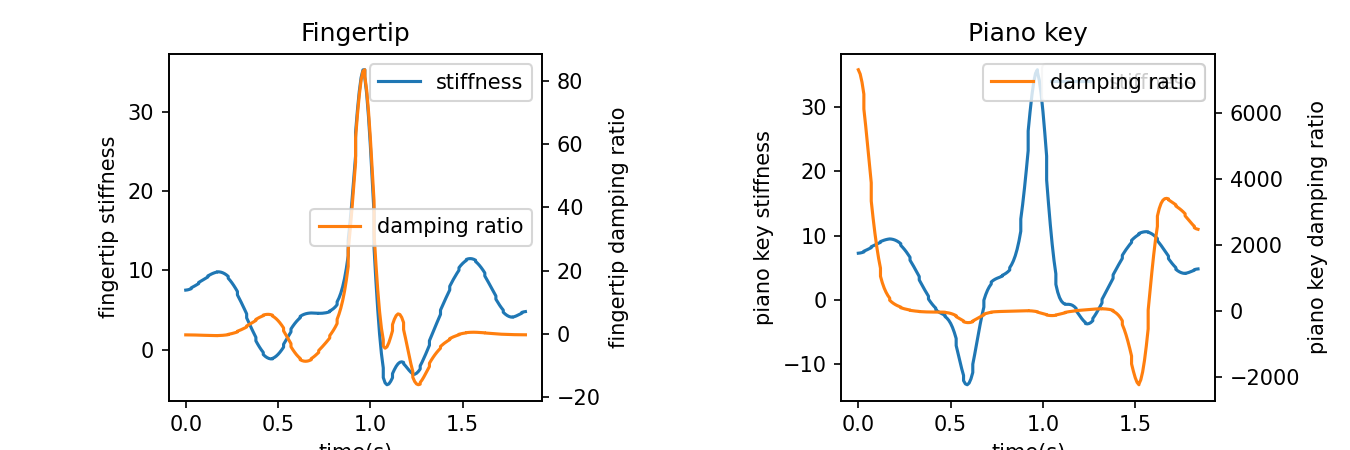

<IPython.core.display.Javascript object>


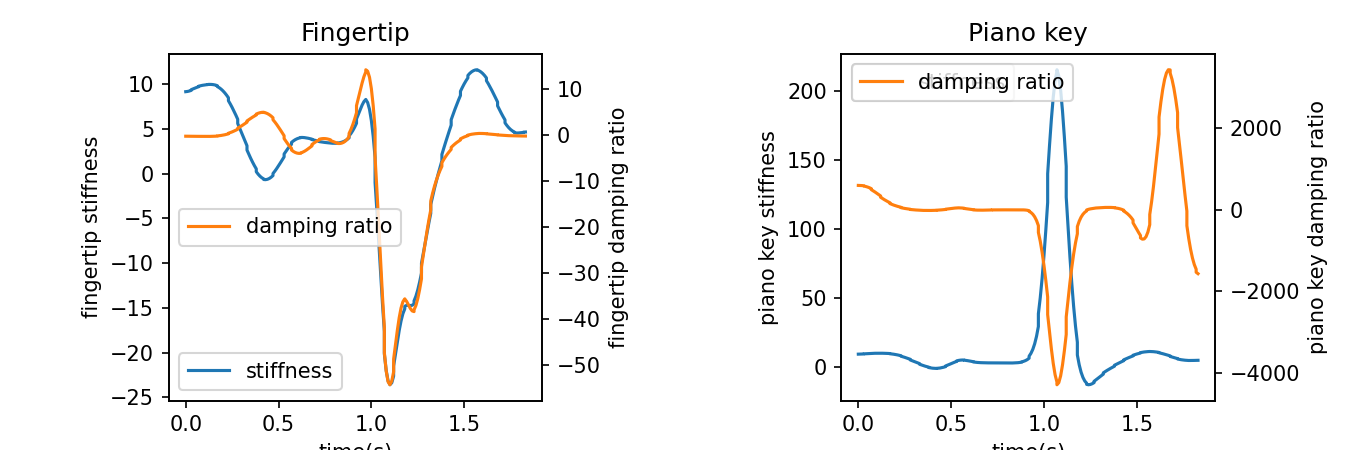

<IPython.core.display.Javascript object>


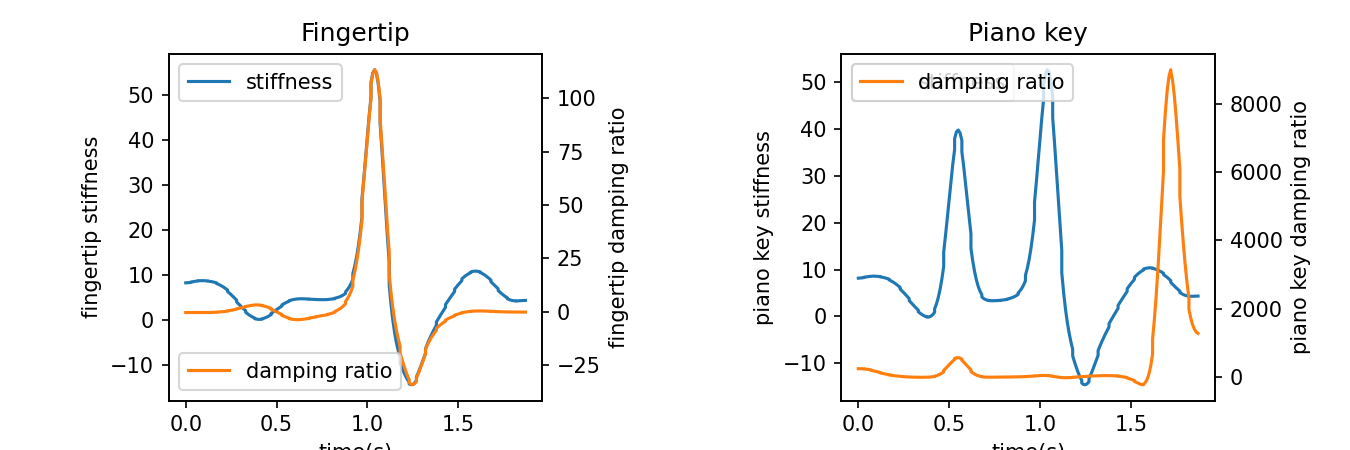

<IPython.core.display.Javascript object>


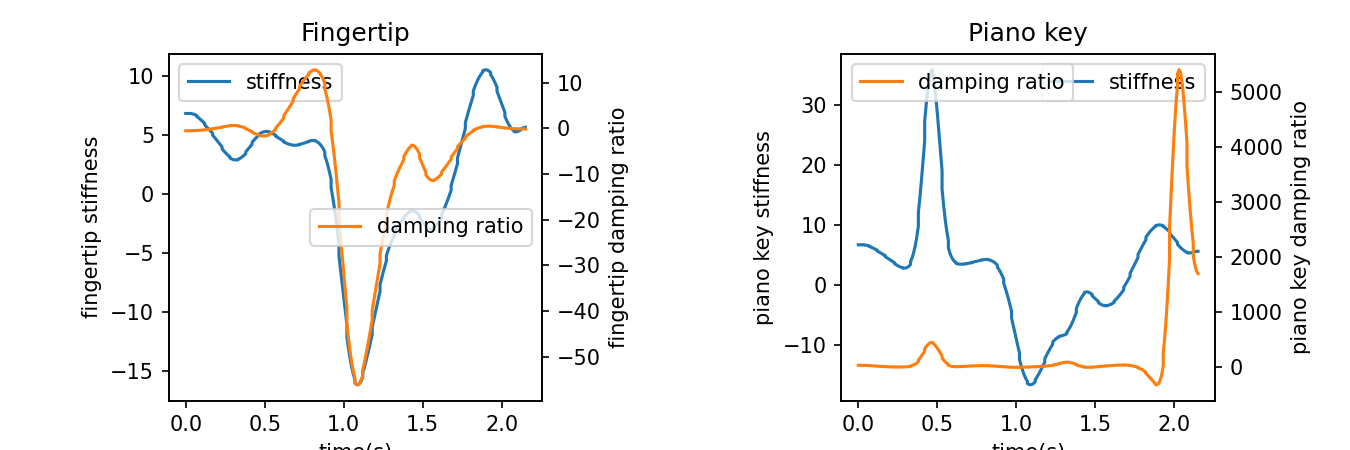

In [27]:
def ckestimate(a_i2,a_i3,vi2,vi3,yi2,yi3,a_j2,a_j3,vj2,vj3,yj2,yj3):
    
    cp = (a_j2*yi3 + a_j3*yi3 - a_i2*yj3 - a_i3*yj3)/(vi3*yj3 - vj3*yi3)


    cf = (a_j2*yi2 - a_j2*yi3 - a_i2*yj2 + a_i2*yj3)/(vi2*yj2 - vj2*yi2 - vi2*yj3 - vi3*yj2 + vj2*yi3 + vj3*yi2 + vi3*yj3 - vj3*yi3)


    kp = (a_i2*vj3**2*yi2 + a_i3*vj3**2*yi2 - a_i3*vj3**2*yi3 + a_j2*vi3**2*yj2 + a_j3*vi3**2*yj2 - a_j3*vi3**2*yj3 - a_j2*vi2*vi3*yj2 + a_j2*vi3*vj2*yi2 + a_j2*vi2*vj3*yi3 - a_j2*vi3*vj2*yi3 - a_j2*vi3*vj3*yi2 - a_j3*vi2*vi3*yj2 + a_j3*vi3*vj2*yi2 + a_j3*vi2*vi3*yj3 - a_j3*vi3*vj2*yi3 - a_j3*vi3*vj3*yi2 + a_j3*vi3*vj3*yi3 + a_i2*vi2*vj3*yj2 - a_i2*vj2*vj3*yi2 - a_i2*vi2*vj3*yj3 + a_i2*vi3*vj2*yj3 - a_i2*vi3*vj3*yj2 + a_i3*vi2*vj3*yj2 - a_i3*vj2*vj3*yi2 - a_i3*vi2*vj3*yj3 - a_i3*vi3*vj3*yj2 + a_i3*vj2*vj3*yi3 + a_i3*vi3*vj3*yj3)/((vi3*yj3 - vj3*yi3)*(vi2*yj2 - vj2*yi2 - vi2*yj3 - vi3*yj2 + vj2*yi3 + vj3*yi2 + vi3*yj3 - vj3*yi3))


    kf = -(a_j2*vi2 - a_j2*vi3 - a_i2*vj2 + a_i2*vj3)/(vi2*yj2 - vj2*yi2 - vi2*yj3 - vi3*yj2 + vj2*yi3 + vj3*yi2 + vi3*yj3 - vj3*yi3)

    return cf,kf,cp,kp

pressure = 60
angle = 45
acc = 1
depth = 0.03
distance = 0.05
hold_time = 0

def plot_c_k(pressure):
    
    with open('../paper_data/all/all_data_soft_'+str(pressure)+'_angle_'+str(angle)+'.txt', 'r') as f:
        lines = f.readlines()
        i = 0

        data = []

        for line in lines:
            dict = ast.literal_eval(line)
            data.append(dict)
            i+=1

    ctrl_vel_list = []
    time_seq_list = []
    ur5_vel_seq_list = []
    ur5_time_seq_list = []

    fin_disp_seq_list = []
    pia_disp_seq_list = []

    fin_vel_seq_list = []
    pia_vel_seq_list = []
    fin_acc_seq_list = []
    pia_acc_seq_list = []
    fin_sub_pia_vel_seq_list = []
    min_pia_vel_list = []
    max_pia_vel_list = []
    time_seq_list = []
    gain = 2

    for d in data:
        ctrl = np.array(d['control'])
        if list(ctrl[[0,1,2,4,5,6]])==list(map(float, [pressure,angle,acc,depth,distance,hold_time])):
            ctrl_vel_list.append(ctrl[3])
            fin_vel_seq_list.append(d['vfi'])
            time_seq_list.append(create_time_seq(len(d['vfi'])))
            ur5_vel_seq_list.append(d['vur'])
            ur5_time_seq_list.append(create_time_seq(len(d['vur'])))

            pia_vel_seq_list.append(d['vpi'])
            fin_sub_pia_vel_seq_list.append(list(np.subtract(np.array(d['vfi']), gain*np.array(d['vpi']))))
            min_pia_vel_list.append(-min(d['vpi']))
            max_pia_vel_list.append(max(d['vpi']))
            
            fin_acc_seq_list.append(get_seq_derivative(d['vfi']))
            pia_acc_seq_list.append(get_seq_derivative(d['vpi']))
            
            
            fin_disp_seq_list.append(gaussian_filter1d(d['dfi'], sigma=8, truncate=6))
            pia_disp_seq_list.append(gaussian_filter1d(d['dpi'], sigma=8, truncate=6))
            
            
    
    cf_seq_list, kf_seq_list, cp_seq_list, kp_seq_list = [],[],[],[]
    
    for i in range(len(fin_disp_seq_list)):
        cf_seq, kf_seq, cp_seq, kp_seq = [],[],[],[]
        for j in range(1,len(fin_disp_seq_list[i])):
            cf,kf,cp,kp = ckestimate(fin_acc_seq_list[i][j-1],pia_acc_seq_list[i][j-1],
                                     fin_vel_seq_list[i][j-1],pia_vel_seq_list[i][j-1],
                                     fin_disp_seq_list[i][j-1],pia_disp_seq_list[i][j-1],
                                     fin_acc_seq_list[i][j],pia_acc_seq_list[i][j],
                                     fin_vel_seq_list[i][j],pia_vel_seq_list[i][j],
                                     fin_disp_seq_list[i][j],pia_disp_seq_list[i][j])
            cf_seq.append(cf)
            kf_seq.append(kf) 
            cp_seq.append(cp)
            kp_seq.append(kp)
            
        cf_seq.insert(0,cf_seq[0])
        kf_seq.insert(0,kf_seq[0])
        cp_seq.insert(0,cp_seq[0])
        kp_seq.insert(0,kp_seq[0])
        
        cf_seq_list.append(cf_seq)
        kf_seq_list.append(kf_seq)
        cp_seq_list.append(cp_seq)
        kp_seq_list.append(kp_seq)
            
    vel = 0.05
    i = 9
    gain = 2
    
    sigma = 6
    truncate = 6

    fig, (ax1, ax3) = plt.subplots(1,2,figsize=(9,3)) 

    # plot fingertip stiffness and damping ratio changing 
    ax1.set_xlabel('time(s)') 
    ax1.set_ylabel('fingertip stiffness') 
    ax1.plot(ur5_time_seq_list[i], gaussian_filter1d(kf_seq_list[i], sigma=sigma, truncate=truncate), label = 'stiffness', color = 'tab:blue')
    ax1.tick_params(axis ='y') 
    ax1.legend()
    
    ax2 = ax1.twinx() 
    ax2.set_ylabel('fingertip damping ratio') 
    ax2.plot(ur5_time_seq_list[i], gaussian_filter1d(cf_seq_list[i], sigma=sigma, truncate=truncate), label = 'damping ratio', color = 'tab:orange')
    ax2.tick_params(axis ='y') 
    ax2.legend()
    
    ax1.set_title('Fingertip')
    
    # plot piano key stiffness and damping ratio changing 
    ax3.set_xlabel('time(s)') 
    ax3.set_ylabel('piano key stiffness') 
    ax3.plot(ur5_time_seq_list[i], gaussian_filter1d(kp_seq_list[i], sigma=sigma, truncate=truncate), label = 'stiffness', color = 'tab:blue')
    ax3.tick_params(axis ='y') 
    ax3.legend()
    
    ax4 = ax3.twinx() 
    ax4.set_ylabel('piano key damping ratio') 
    ax4.plot(ur5_time_seq_list[i], gaussian_filter1d(cp_seq_list[i], sigma=sigma, truncate=truncate), label = 'damping ratio', color = 'tab:orange')
    ax4.tick_params(axis ='y') 
    ax4.legend()
    
    ax3.set_title('Piano key')

    fig.subplots_adjust(wspace=0.8)
    plt.show()

plot_c_k(20)
plot_c_k(40)
plot_c_k(60)
plot_c_k(80)

<IPython.core.display.Javascript object>


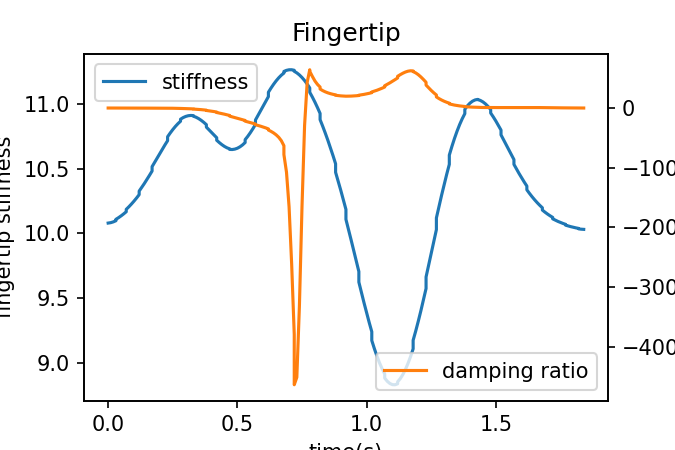

<IPython.core.display.Javascript object>


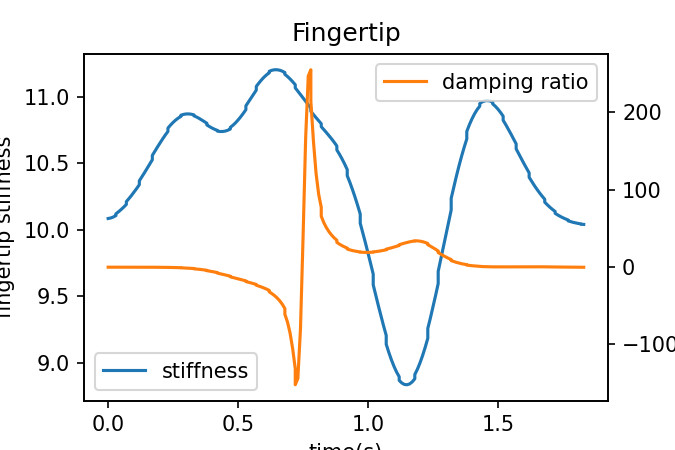

<IPython.core.display.Javascript object>


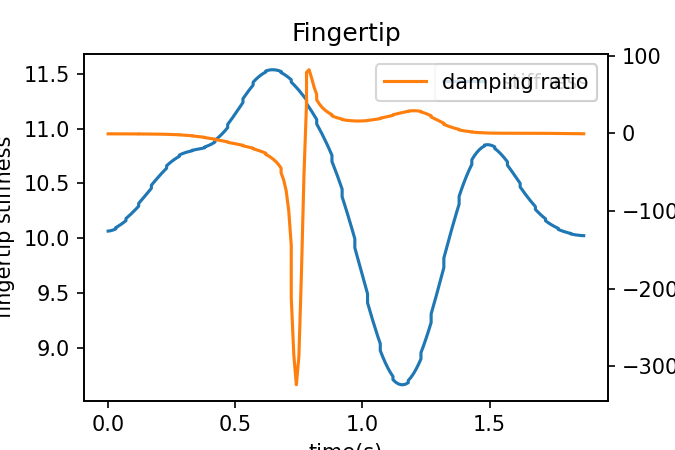

<IPython.core.display.Javascript object>


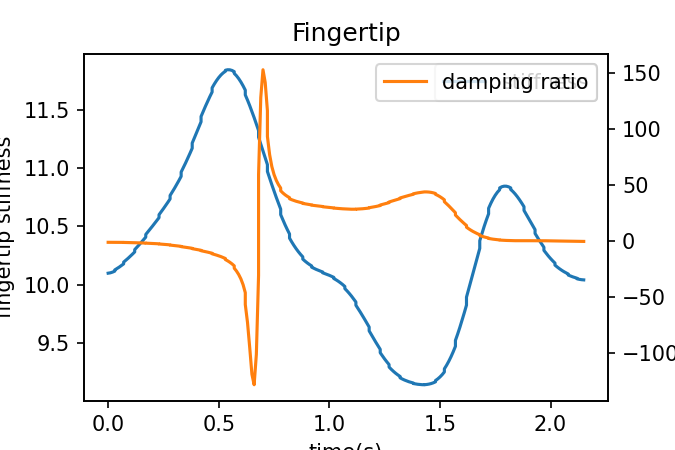

In [32]:
def ckestimate(a_i2,a_i3,vi2,vi3,yi2,yi3,cp,kp):

    cf = -(a_i2*yi2 + a_i3*yi2 - a_i3*yi3 - kp*yi3**2 + cp*vi3*yi2 - cp*vi3*yi3 + kp*yi2*yi3)/(yi3*(vi2 - vi3))


    kf = (a_i2 + a_i3 + cp*vi3 + kp*yi3)/yi3

    return cf,kf

pressure = 60
angle = 45
acc = 1
depth = 0.03
distance = 0.05
hold_time = 0

def plot_c_k(pressure):
    
    with open('../paper_data/all/all_data_soft_'+str(pressure)+'_angle_'+str(angle)+'.txt', 'r') as f:
        lines = f.readlines()
        i = 0

        data = []

        for line in lines:
            dict = ast.literal_eval(line)
            data.append(dict)
            i+=1

    ctrl_vel_list = []
    time_seq_list = []
    ur5_vel_seq_list = []
    ur5_time_seq_list = []

    fin_disp_seq_list = []
    pia_disp_seq_list = []

    fin_vel_seq_list = []
    pia_vel_seq_list = []
    fin_acc_seq_list = []
    pia_acc_seq_list = []
    fin_sub_pia_vel_seq_list = []
    min_pia_vel_list = []
    max_pia_vel_list = []
    time_seq_list = []
    gain = 2

    for d in data:
        ctrl = np.array(d['control'])
        if list(ctrl[[0,1,2,4,5,6]])==list(map(float, [pressure,angle,acc,depth,distance,hold_time])):
            ctrl_vel_list.append(ctrl[3])
            fin_vel_seq_list.append(d['vfi'])
            time_seq_list.append(create_time_seq(len(d['vfi'])))
            ur5_vel_seq_list.append(d['vur'])
            ur5_time_seq_list.append(create_time_seq(len(d['vur'])))

            pia_vel_seq_list.append(d['vpi'])
            fin_sub_pia_vel_seq_list.append(list(np.subtract(np.array(d['vfi']), gain*np.array(d['vpi']))))
            min_pia_vel_list.append(-min(d['vpi']))
            max_pia_vel_list.append(max(d['vpi']))
            
            fin_acc_seq_list.append(get_seq_derivative(d['vfi']))
            pia_acc_seq_list.append(get_seq_derivative(d['vpi']))
            
            
            fin_disp_seq_list.append(gaussian_filter1d(d['dfi'], sigma=8, truncate=6))
            pia_disp_seq_list.append(gaussian_filter1d(d['dpi'], sigma=8, truncate=6))
            
            
    
    cp = -15
    kp = 10
    cf_seq_list, kf_seq_list = [],[]
    
    for i in range(len(fin_disp_seq_list)):
        cf_seq, kf_seq = [],[]
        for j in range(len(fin_disp_seq_list[i])):
            cf,kf = ckestimate(fin_acc_seq_list[i][j],pia_acc_seq_list[i][j],
                               fin_vel_seq_list[i][j],pia_vel_seq_list[i][j],
                               fin_disp_seq_list[i][j],pia_disp_seq_list[i][j],cp,kp)
            cf_seq.append(cf)
            kf_seq.append(kf) 
        
        cf_seq_list.append(cf_seq)
        kf_seq_list.append(kf_seq)
            
    vel = 0.05
    i = 9
    gain = 2
    
    sigma = 2
    truncate = 4

#     fig, (ax1, ax3) = plt.subplots(1,2,figsize=(4.5,3)) 
    fig, ax1 = plt.subplots(1,1,figsize=(4.5,3)) 

    # plot fingertip stiffness and damping ratio changing 
    ax1.set_xlabel('time(s)') 
    ax1.set_ylabel('fingertip stiffness') 
    ax1.plot(ur5_time_seq_list[i], gaussian_filter1d(kf_seq_list[i], sigma=sigma, truncate=truncate), label = 'stiffness', color = 'tab:blue')
    ax1.tick_params(axis ='y') 
    ax1.legend()
    
    ax2 = ax1.twinx() 
    ax2.set_ylabel('fingertip damping ratio') 
    ax2.plot(ur5_time_seq_list[i], gaussian_filter1d(cf_seq_list[i], sigma=sigma, truncate=truncate), label = 'damping ratio', color = 'tab:orange')
    ax2.tick_params(axis ='y') 
    ax2.legend()
    
    ax1.set_title('Fingertip')
    
#     # plot piano key stiffness and damping ratio changing 
#     ax3.set_xlabel('time(s)') 
#     ax3.set_ylabel('piano key stiffness') 
#     ax3.plot(ur5_time_seq_list[i], gaussian_filter1d(kp_seq_list[i], sigma=sigma, truncate=truncate), label = 'stiffness', color = 'tab:blue')
#     ax3.tick_params(axis ='y') 
#     ax3.legend()
    
#     ax4 = ax3.twinx() 
#     ax4.set_ylabel('piano key damping ratio') 
#     ax4.plot(ur5_time_seq_list[i], gaussian_filter1d(cp_seq_list[i], sigma=sigma, truncate=truncate), label = 'damping ratio', color = 'tab:orange')
#     ax4.tick_params(axis ='y') 
#     ax4.legend()
    
#     ax3.set_title('Piano key')

#     fig.subplots_adjust(wspace=0.8)
    plt.show()

plot_c_k(20)
plot_c_k(40)
plot_c_k(60)
plot_c_k(80)

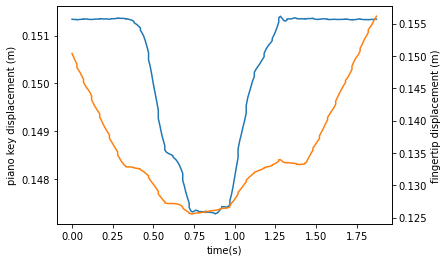

<Figure size 576x432 with 0 Axes>

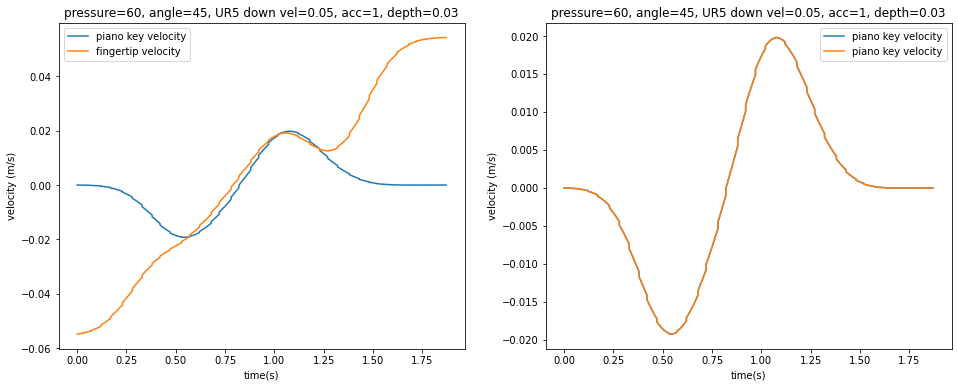

In [145]:
# Divide the contact phase into different stages
vel = 0.05
i = 9
gain = 2

# plt.figure(figsize=(16,12))

# plt.subplot(1, 3, 1)
# plt.plot(ur5_time_seq_list[i], pia_disp_seq_list[i], label = 'piano key')
# plt.plot(ur5_time_seq_list[i], fin_disp_seq_list[i], label = 'fingertip')
# plt.title("pressure="+str(pressure)+', angle='+str(angle)+', UR5 down vel='+str(vel)+', acc='+str(acc)+', depth='+str(depth))
# plt.xlabel('time(s)')
# plt.ylabel('displacement (m)')
# plt.legend() 

fig, ax1 = plt.subplots() 
plt.figure(figsize=(8,6))

ax1.set_xlabel('time(s)') 
ax1.set_ylabel('piano key displacement (m)') 
ax1.plot(ur5_time_seq_list[i], pia_disp_seq_list[i], label = 'piano key', color = 'tab:blue')
ax1.tick_params(axis ='y') 
# ax1.legend()

ax2 = ax1.twinx() 
ax2.set_ylabel('fingertip displacement (m)') 
ax2.plot(ur5_time_seq_list[i], fin_disp_seq_list[i], label = 'fingertip', color = 'tab:orange')
ax2.tick_params(axis ='y') 
# ax2.legend()

plt.figure(figsize=(16,6))

plt.subplot(1, 2, 1)
plt.plot(ur5_time_seq_list[i], list(gain*np.array(pia_vel_seq_list[i])), label = 'piano key velocity')
plt.plot(ur5_time_seq_list[i], fin_vel_seq_list[i], label = 'fingertip velocity')
# plt.plot(ur5_time_seq_list[i], fin_sub_pia_vel_seq_list[i], label = 'fingertip - piano key velocity')
plt.title("pressure="+str(pressure)+', angle='+str(angle)+', UR5 down vel='+str(vel)+', acc='+str(acc)+', depth='+str(depth))
plt.xlabel('time(s)')
plt.ylabel('velocity (m/s)')
plt.legend() 

plt.subplot(1, 2, 2)
plt.plot(ur5_time_seq_list[i], list(gain*np.array(pia_vel_seq_list[i])), label = 'piano key velocity')
plt.plot(ur5_time_seq_list[i], list(gain*np.array(pia_vel_seq_list[i])), label = 'piano key velocity')
plt.title("pressure="+str(pressure)+', angle='+str(angle)+', UR5 down vel='+str(vel)+', acc='+str(acc)+', depth='+str(depth))
plt.xlabel('time(s)')
plt.ylabel('velocity (m/s)')
plt.legend() 

plt.show()

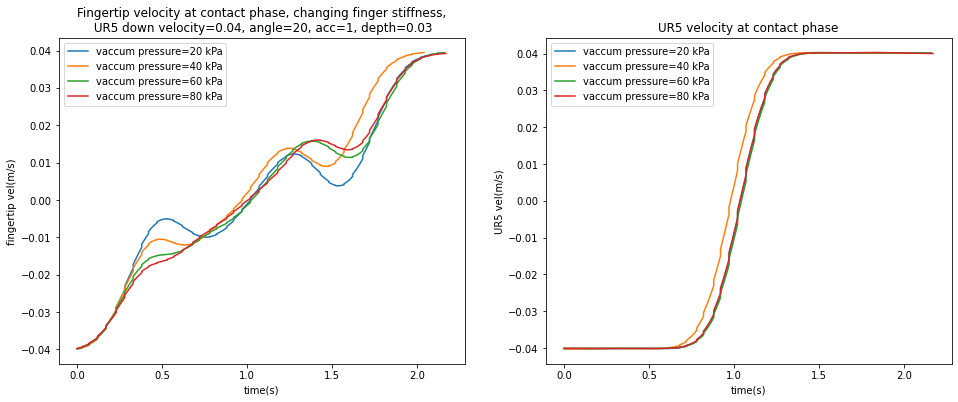

In [69]:
# velocity diagram changing under changing finger stiffness
pressure_list = [20,40,60,80]
angle = 20
acc = 1
depth = 0.03
distance = 0.05
hold_time = 0
vel = 0.04

all_data = []

for pressure in pressure_list:
    with open('../paper_data/all/all_data_soft_'+str(pressure)+'_angle_'+str(angle)+'.txt', 'r') as f:
        lines = f.readlines()
        i = 0

        data = []

        for line in lines:
            dict = ast.literal_eval(str(line))
            data.append(dict)
            i+=1
        
        all_data.append(data)
        
vel_seq_list = []
time_seq_list = []
ur5_vel_seq_list = []
ur5_time_seq_list = []


for a,p in zip(all_data,pressure_list):
    for d in a:
        ctrl = np.array(d['control'])
        if list(ctrl[[0,1,2,3,4,5,6]])==list(map(float, [p,angle,acc,vel,depth,distance,hold_time])):
            vel_seq_list.append(d['vfi'])
            time_seq_list.append(create_time_seq(len(d['vfi'])))
            ur5_vel_seq_list.append(d['vur'])
            ur5_time_seq_list.append(create_time_seq(len(d['vur'])))

plt.figure(figsize=(16,6))

plt.subplot(1, 2, 1)
for i in range(len(pressure_list)):
    plt.plot(time_seq_list[i], vel_seq_list[i], label = str('vaccum pressure='+str(pressure_list[i])+' kPa'))

    
plt.title("Fingertip velocity at contact phase, changing finger stiffness,"+"\n"+" UR5 down velocity="+str(vel)+', angle='+str(angle)+', acc='+str(acc)+', depth='+str(depth))
plt.xlabel('time(s)')
plt.ylabel('fingertip vel(m/s)')
plt.legend() 

plt.subplot(1, 2, 2)
for i in range(len(pressure_list)):
    plt.plot(ur5_time_seq_list[i], ur5_vel_seq_list[i], label = str('vaccum pressure='+str(pressure_list[i])+' kPa'))
plt.title("UR5 velocity at contact phase")
plt.xlabel('time(s)')
plt.ylabel('UR5 vel(m/s)')
plt.legend() 
plt.show()

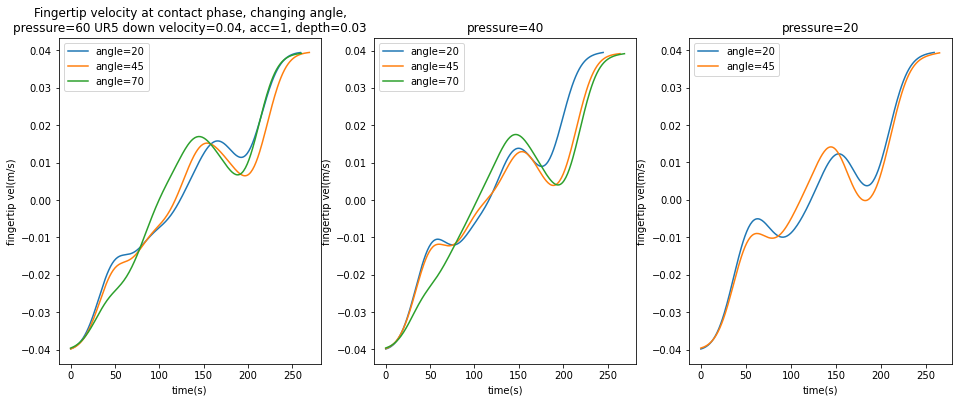

In [87]:
# velocity diagram changing under changing finger angle
pressure = 60
angle_list = [20,45,70]
acc = 1
depth = 0.03
distance = 0.05
hold_time = 0
vel = 0.04



def load_data(pressure,angle):
    all_data = []
    
    for angle in angle_list:
        with open('../paper_data/all/all_data_soft_'+str(pressure)+'_angle_'+str(angle)+'.txt', 'r') as f:
            lines = f.readlines()
            i = 0

            data = []

            for line in lines:
                dict = ast.literal_eval(str(line))
                data.append(dict)
                i+=1

            all_data.append(data)
            
    return all_data
        


plt.figure(figsize=(16,6))

plt.subplot(1, 3, 1)
all_data = load_data(pressure,angle)
vel_seq_list = []
for a,angle in zip(all_data,angle_list):
    for d in a:
        ctrl = np.array(d['control'])
        if list(ctrl[[0,1,2,3,4,5,6]])==list(map(float, [pressure,angle,acc,vel,depth,distance,hold_time])):
            vel_seq_list.append(d['vfi'])
for i in range(len(angle_list)):
    plt.plot(vel_seq_list[i], label = str("angle="+str(angle_list[i])))
    
plt.title("Fingertip velocity at contact phase, changing angle,"+"\n"+"pressure="+str(pressure)+" UR5 down velocity="+str(vel)+', acc='+str(acc)+', depth='+str(depth))
plt.xlabel('time(s)')
plt.ylabel('fingertip vel(m/s)')
plt.legend()   

plt.subplot(1, 3, 2)
pressure = 40
all_data = load_data(pressure,angle)
vel_seq_list = []
for a,angle in zip(all_data,angle_list):
    for d in a:
        ctrl = np.array(d['control'])
        if list(ctrl[[0,1,2,3,4,5,6]])==list(map(float, [pressure,angle,acc,vel,depth,distance,hold_time])):
            vel_seq_list.append(d['vfi'])
for i in range(len(angle_list)):
    plt.plot(vel_seq_list[i], label = str("angle="+str(angle_list[i])))
    
plt.title("pressure="+str(pressure))
plt.xlabel('time(s)')
plt.ylabel('fingertip vel(m/s)')
plt.legend() 

plt.subplot(1, 3, 3)

pressure = 20
angle_list = [20,45]
all_data = load_data(pressure,angle)
vel_seq_list = []
for a,angle in zip(all_data,angle_list):
    for d in a:
        ctrl = np.array(d['control'])
        if list(ctrl[[0,1,2,3,4,5,6]])==list(map(float, [pressure,angle,acc,vel,depth,distance,hold_time])):
            vel_seq_list.append(d['vfi'])
for i in range(len(angle_list)):
    plt.plot(vel_seq_list[i], label = str("angle="+str(angle_list[i])))
    
plt.title("pressure="+str(pressure))
plt.xlabel('time(s)')
plt.ylabel('fingertip vel(m/s)')
plt.legend() 
plt.show()

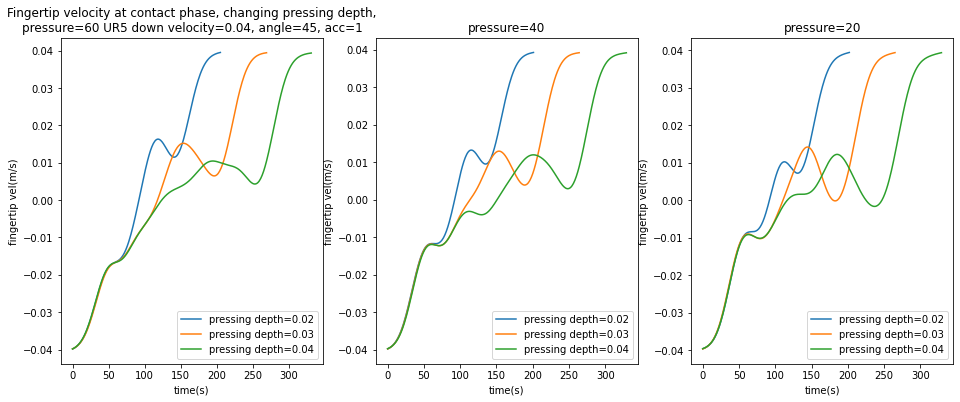

In [96]:
# velocity diagram changing under changing finger angle
pressure = 60
angle = 45
acc = 1
depth_list = [0.02,0.03,0.04]
distance = 0.05
hold_time = 0
vel = 0.04



def load_data(pressure,angle):
    
    data = []
    with open('../paper_data/all/all_data_soft_'+str(pressure)+'_angle_'+str(angle)+'.txt', 'r') as f:
        lines = f.readlines()
        i = 0
        for line in lines:
            dict = ast.literal_eval(str(line))
            data.append(dict)
            i+=1
            
    return data
        


plt.figure(figsize=(16,6))

plt.subplot(1, 3, 1)
all_data = load_data(pressure,angle)
vel_seq_list = []

for depth in depth_list:
    for a in all_data:
        ctrl = np.array(a['control'])
        if list(ctrl[[0,1,2,3,4,5,6]])==list(map(float, [pressure,angle,acc,vel,depth,distance,hold_time])):
            vel_seq_list.append(a['vfi'])

for i in range(len(depth_list)):
    plt.plot(vel_seq_list[i], label = str("pressing depth="+str(depth_list[i])))
    
plt.title("Fingertip velocity at contact phase, changing pressing depth,"+"\n"+"pressure="+str(pressure)+" UR5 down velocity="+str(vel)+', angle='+str(angle)+', acc='+str(acc))
plt.xlabel('time(s)')
plt.ylabel('fingertip vel(m/s)')
plt.legend()  


plt.subplot(1, 3, 2)
pressure = 40
all_data = load_data(pressure,angle)
vel_seq_list = []
for depth in depth_list:
    for a in all_data:
        ctrl = np.array(a['control'])
        if list(ctrl[[0,1,2,3,4,5,6]])==list(map(float, [pressure,angle,acc,vel,depth,distance,hold_time])):
            vel_seq_list.append(a['vfi'])
            
for i in range(len(depth_list)):
    plt.plot(vel_seq_list[i], label = str("pressing depth="+str(depth_list[i])))
    
plt.title("pressure="+str(pressure))
plt.xlabel('time(s)')
plt.ylabel('fingertip vel(m/s)')
plt.legend()   

plt.subplot(1, 3, 3)

pressure = 20
all_data = load_data(pressure,angle)
vel_seq_list = []
for depth in depth_list:
    for a in all_data:
        ctrl = np.array(a['control'])
        if list(ctrl[[0,1,2,3,4,5,6]])==list(map(float, [pressure,angle,acc,vel,depth,distance,hold_time])):
            vel_seq_list.append(a['vfi'])
            
for i in range(len(depth_list)):
    plt.plot(vel_seq_list[i], label = str("pressing depth="+str(depth_list[i])))
    
plt.title("pressure="+str(pressure))
plt.xlabel('time(s)')
plt.ylabel('fingertip vel(m/s)')
plt.legend()   
plt.show()

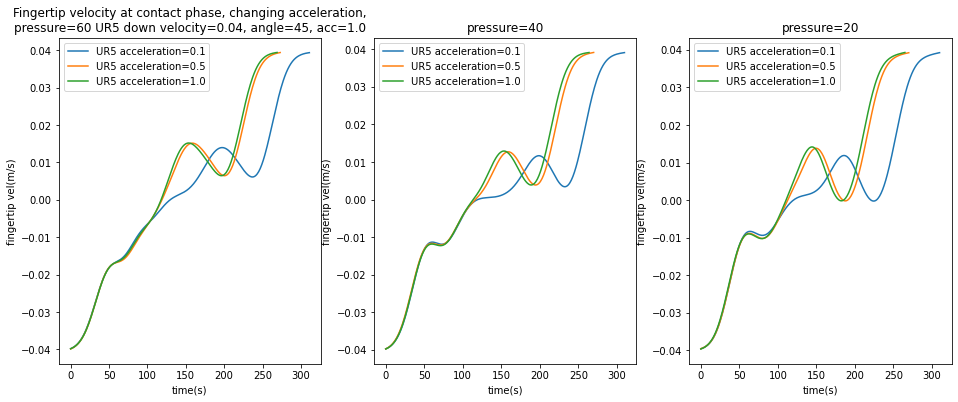

In [98]:
# velocity diagram changing under changing finger angle
pressure = 60
angle = 45
acc_list = [0.1,0.5,1.0]
depth = 0.03
distance = 0.05
hold_time = 0
vel = 0.04



def load_data(pressure,angle):
    
    data = []
    with open('../paper_data/all/all_data_soft_'+str(pressure)+'_angle_'+str(angle)+'.txt', 'r') as f:
        lines = f.readlines()
        i = 0
        for line in lines:
            dict = ast.literal_eval(str(line))
            data.append(dict)
            i+=1
            
    return data
        


plt.figure(figsize=(16,6))

plt.subplot(1, 3, 1)
all_data = load_data(pressure,angle)
vel_seq_list = []

for acc in acc_list:
    for a in all_data:
        ctrl = np.array(a['control'])
        if list(ctrl[[0,1,2,3,4,5,6]])==list(map(float, [pressure,angle,acc,vel,depth,distance,hold_time])):
            vel_seq_list.append(a['vfi'])

for i in range(len(acc_list)):
    plt.plot(vel_seq_list[i], label = str("UR5 acceleration="+str(acc_list[i])))
    
plt.title("Fingertip velocity at contact phase, changing acceleration,"+"\n"+"pressure="+str(pressure)+" UR5 down velocity="+str(vel)+', angle='+str(angle)+', acc='+str(acc))
plt.xlabel('time(s)')
plt.ylabel('fingertip vel(m/s)')
plt.legend()  


plt.subplot(1, 3, 2)
pressure = 40
all_data = load_data(pressure,angle)
vel_seq_list = []
for acc in acc_list:
    for a in all_data:
        ctrl = np.array(a['control'])
        if list(ctrl[[0,1,2,3,4,5,6]])==list(map(float, [pressure,angle,acc,vel,depth,distance,hold_time])):
            vel_seq_list.append(a['vfi'])

for i in range(len(acc_list)):
    plt.plot(vel_seq_list[i], label = str("UR5 acceleration="+str(acc_list[i])))
    
plt.title("pressure="+str(pressure))
plt.xlabel('time(s)')
plt.ylabel('fingertip vel(m/s)')
plt.legend()   

plt.subplot(1, 3, 3)

pressure = 20
all_data = load_data(pressure,angle)
vel_seq_list = []
for acc in acc_list:
    for a in all_data:
        ctrl = np.array(a['control'])
        if list(ctrl[[0,1,2,3,4,5,6]])==list(map(float, [pressure,angle,acc,vel,depth,distance,hold_time])):
            vel_seq_list.append(a['vfi'])

for i in range(len(acc_list)):
    plt.plot(vel_seq_list[i], label = str("UR5 acceleration="+str(acc_list[i])))
    
plt.title("pressure="+str(pressure))
plt.xlabel('time(s)')
plt.ylabel('fingertip vel(m/s)')
plt.legend()    
plt.show()

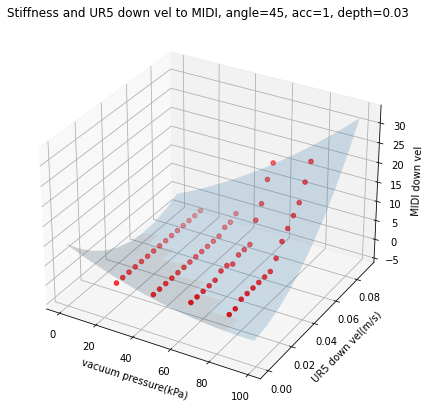

In [86]:
import numpy as np
import scipy.linalg
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# stiffness, velocity - midi
pressure_list = [20,40,60,80]
angle = 45
acc = 1
depth = 0.03
distance = 0.05
hold_time = 0

all_data = []

for pressure in pressure_list:
    with open('../paper_data/all/all_data_soft_'+str(pressure)+'_angle_'+str(angle)+'.txt', 'r') as f:
        lines = f.readlines()
        i = 0

        data = []

        for line in lines:
            dict = ast.literal_eval(str(line))
            data.append(dict)
            i+=1
        
        all_data.append(data)
        
p_list = []
ctrl_v_list = []
midi_v_down_list = []
midi_v_up_list = []

for a,p in zip(all_data,pressure_list):
    for d in a:
        ctrl = np.array(d['control'])
        midi = d['midi']
        if list(ctrl[[0,1,2,4,5,6]])==list(map(float, [p,angle,acc,depth,distance,hold_time])):
            p_list.append(p)
            ctrl_v_list.append(ctrl[3])
            if midi!=[]:
                midi_v_down_list.append(midi[0][0][2])
                midi_v_up_list.append(midi[1][0][2])
            else:
                midi_v_down_list.append(0)
                midi_v_up_list.append(0)               


# for i in range(len(pressure_list)):
#     plt.plot(vel_seq_list[i], label = str(pressure_list[i]))
    
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(projection='3d')

ax.scatter(p_list, ctrl_v_list, midi_v_down_list, c='r', s=20)
ax.set_title('Stiffness and UR5 down vel to MIDI'+', angle='+str(angle)+', acc='+str(acc)+', depth='+str(depth))
ax.set_xlabel('vacuum pressure(kPa)')
ax.set_ylabel('UR5 down vel(m/s)')
ax.set_zlabel('MIDI down vel')   

data = []
for i in range(len(p_list)):
    data.append([p_list[i], ctrl_v_list[i], midi_v_down_list[i]])

data = np.array(data)

# regular grid covering the domain of the data
X,Y = np.meshgrid(np.arange(0, 100, 1), np.arange(0, 0.1, 0.01))
XX = X.flatten()
YY = Y.flatten()

order = 2    # 1: linear, 2: quadratic
if order == 1:
    # best-fit linear plane
    A = np.c_[data[:,0], data[:,1], np.ones(data.shape[0])]
    C,_,_,_ = scipy.linalg.lstsq(A, data[:,2])    # coefficients
    
    # evaluate it on grid
    Z = C[0]*X + C[1]*Y + C[2]
    
    # or expressed using matrix/vector product
    #Z = np.dot(np.c_[XX, YY, np.ones(XX.shape)], C).reshape(X.shape)

elif order == 2:
    # best-fit quadratic curve
    A = np.c_[np.ones(data.shape[0]), data[:,:2], np.prod(data[:,:2], axis=1), data[:,:2]**2]
    C,_,_,_ = scipy.linalg.lstsq(A, data[:,2])
    
    # evaluate it on a grid
    Z = np.dot(np.c_[np.ones(XX.shape), XX, YY, XX*YY, XX**2, YY**2], C).reshape(X.shape)

# plot points and fitted surface
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, alpha=0.2)
# ax.axis('equal')
# ax.axis('tight')
plt.show()


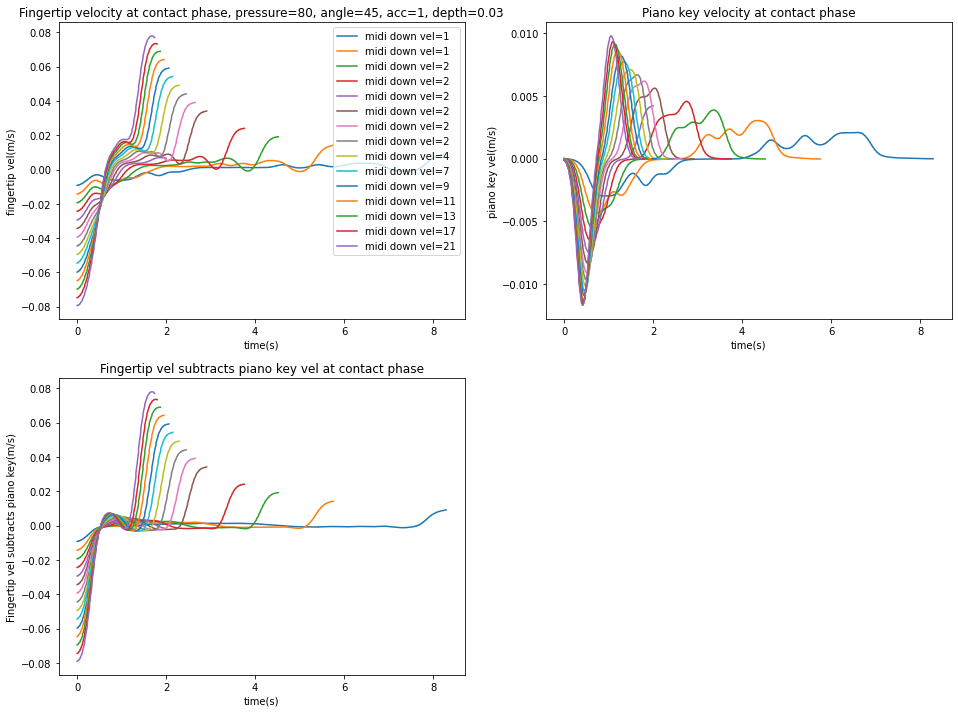

In [126]:
# camera captures the human playing, comparison with robot playing
# inverse kinematics.

# piano key velocity to midi 
# Is midi stable? If not, how unstable is it? 
# velocity diagram changing under changing finger angle
pressure = 80
angle = 45
acc = 1
depth = 0.03
distance = 0.05
hold_time = 0
vel = 0.04

def load_data(pressure,angle):
    
    data = []
    with open('../paper_data/all/all_data_soft_'+str(pressure)+'_angle_'+str(angle)+'.txt', 'r') as f:
        lines = f.readlines()
        i = 0
        for line in lines:
            dict = ast.literal_eval(str(line))
            data.append(dict)
            i+=1
            
    return data

all_data = load_data(pressure,angle)

midi_v_down_list = []
midi_v_up_list = []
fin_vel_seq_list = []
pia_vel_seq_list = []
fin_sub_pia_vel_seq_list = []
min_pia_vel_list = []
max_pia_vel_list = []
time_seq_list = []
gain = 2
for d in all_data:
    ctrl = np.array(d['control'])
    midi = d['midi']
    if list(ctrl[[0,1,2,4,5,6]])==list(map(float, [pressure,angle,acc,depth,distance,hold_time])):
        fin_vel_seq_list.append(d['vfi'])
        pia_vel_seq_list.append(d['vpi'])
        fin_sub_pia_vel_seq_list.append(list(np.subtract(np.array(d['vfi']), gain*np.array(d['vpi']))))
        min_pia_vel_list.append(-min(d['vpi']))
        max_pia_vel_list.append(max(d['vpi']))
        time_seq_list.append(create_time_seq(len(d['vfi'])))
        if midi!=[]:
            midi_v_down_list.append(midi[0][0][2])
            midi_v_up_list.append(midi[1][0][2])
        else:
            midi_v_down_list.append(0)
            midi_v_up_list.append(0)
    


plt.figure(figsize=(16,12))

plt.subplot(2, 2, 1)

for i in range(len(midi_v_down_list)):
    plt.plot(time_seq_list[i],fin_vel_seq_list[i], label = str("midi down vel="+str(midi_v_down_list[i])))
    
plt.title("Fingertip velocity at contact phase, pressure="+str(pressure)+', angle='+str(angle)+', acc='+str(acc)+', depth='+str(depth))
plt.xlabel('time(s)')
plt.ylabel('fingertip vel(m/s)')
plt.legend()   

plt.subplot(2, 2, 2)

for i in range(len(midi_v_down_list)):
    plt.plot(time_seq_list[i],pia_vel_seq_list[i], label = str("midi down vel="+str(midi_v_down_list[i])))
    
plt.title("Piano key velocity at contact phase")
plt.xlabel('time(s)')
plt.ylabel('piano key vel(m/s)')
# plt.legend()  

plt.subplot(2, 2, 3)

for i in range(len(midi_v_down_list)):
    plt.plot(time_seq_list[i],fin_sub_pia_vel_seq_list[i], label = str("midi down vel="+str(midi_v_down_list[i])))
    
plt.title("Fingertip vel subtracts piano key vel at contact phase")
plt.xlabel('time(s)')
plt.ylabel('Fingertip vel subtracts piano key(m/s)')
# plt.legend()  

plt.show()

In [116]:
# fingertip velocity - piano key velocity 

plt.figure(figsize=(8,6))

for i in range(len(midi_v_down_list)):
    plt.plot(time_seq_list[i], fin_vel_seq_list[i]-pia_vel_seq_list[i], label = str("midi down vel="+str(midi_v_down_list[i])))
    
plt.title("Fingertip velocity at contact phase, pressure="+str(pressure)+', angle='+str(angle)+', acc='+str(acc)+', depth='+str(depth))
plt.xlabel('time(s)')
plt.ylabel('fingertip vel(m/s)')
plt.legend()   


TypeError: unsupported operand type(s) for -: 'list' and 'list'

<Figure size 576x432 with 0 Axes>

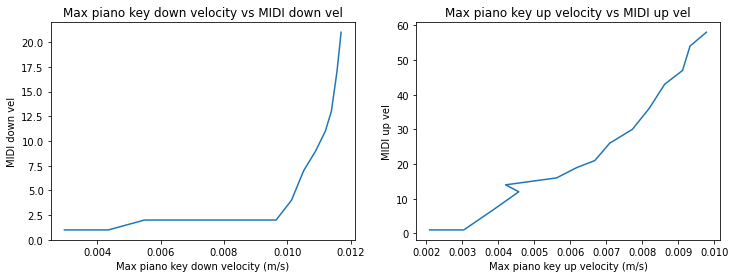

In [115]:
# MIDI vs piano key velocity 

pressure = 80
angle = 45
acc = 1
depth = 0.03
distance = 0.05
hold_time = 0
vel = 0.04

def load_data(pressure,angle):
    
    data = []
    with open('../paper_data/all/all_data_soft_'+str(pressure)+'_angle_'+str(angle)+'.txt', 'r') as f:
        lines = f.readlines()
        i = 0
        for line in lines:
            dict = ast.literal_eval(str(line))
            data.append(dict)
            i+=1
            
    return data

all_data = load_data(pressure,angle)

midi_v_down_list = []
midi_v_up_list = []
fin_vel_seq_list = []
pia_vel_seq_list = []
min_pia_vel_list = []
max_pia_vel_list = []

for d in all_data:
    ctrl = np.array(d['control'])
    midi = d['midi']
    if list(ctrl[[0,1,2,4,5,6]])==list(map(float, [pressure,angle,acc,depth,distance,hold_time])):
        fin_vel_seq_list.append(d['vfi'])
        pia_vel_seq_list.append(d['vpi'])
        min_pia_vel_list.append(-min(d['vpi']))
        max_pia_vel_list.append(max(d['vpi']))
        if midi!=[]:
            midi_v_down_list.append(midi[0][0][2])
            midi_v_up_list.append(midi[1][0][2])
        else:
            midi_v_down_list.append(0)
            midi_v_up_list.append(0)
            
            
plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)
plt.plot(min_pia_vel_list,midi_v_down_list)
plt.title("Max piano key down velocity vs MIDI down vel")
plt.xlabel('Max piano key down velocity (m/s)')
plt.ylabel('MIDI down vel')


plt.subplot(1, 2, 2)
plt.plot(max_pia_vel_list,midi_v_up_list)
plt.title("Max piano key up velocity vs MIDI up vel")
plt.xlabel('Max piano key up velocity (m/s)')
plt.ylabel('MIDI up vel')

plt.show()

In [ ]:
# force to midi